In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from warnings import filterwarnings
filterwarnings('ignore')

In [75]:
df=pd.read_csv("data.csv")

In [76]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [77]:
df=df.iloc[:,1:len(df)]

In [78]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [79]:
df["satisfaction"] =df["satisfaction"].replace(["satisfied"], 1)
df["satisfaction"] =df["satisfaction"].replace(["neutral or dissatisfied"], 0)


In [7]:
df.shape

(129880, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [9]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.00,3.0,4.00,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.00,4.0,5.00,5.0


In [11]:
df["satisfaction"].value_counts()

0    73452
1    56428
Name: satisfaction, dtype: int64

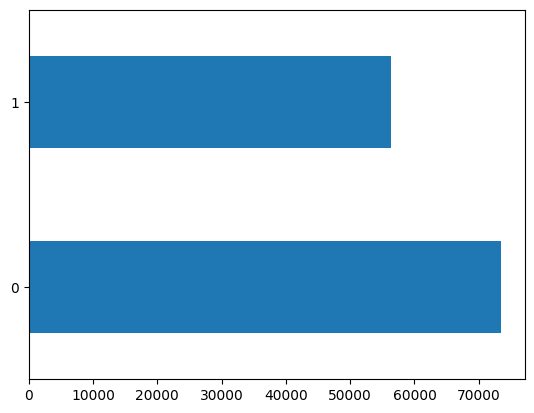

In [12]:
df["satisfaction"].value_counts().plot.barh();

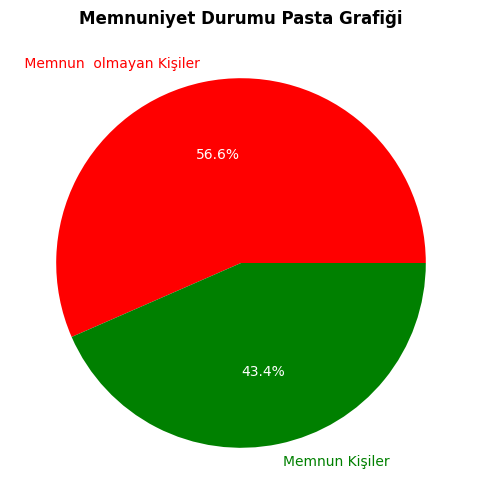

In [13]:
plt.figure(figsize=(6, 6))
labels = "Memnun  olmayan Kişiler", "Memnun Kişiler"
patches, texts, autotexts = plt.pie(df["satisfaction"].value_counts(), colors=['red', 'green'], autopct='%.1f%%', radius=1, labels=[" Memnun  olmayan Kişiler", "Memnun Kişiler"], )
texts[0].set_color('red')
texts[1].set_color('green')
[autotext.set_color('white') for autotext in autotexts]
plt.title('Memnuniyet Durumu Pasta Grafiği', color ='black', weight= 'bold')
plt.show()

## Veri Görselleştirme 

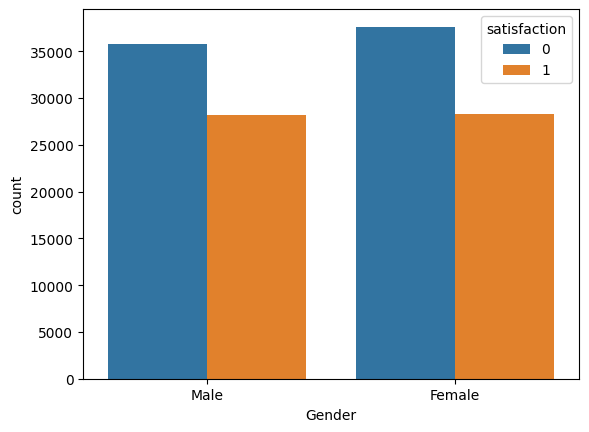

In [80]:
plt.figure()                                            
sns.countplot(x="Gender",data=df,hue="satisfaction");

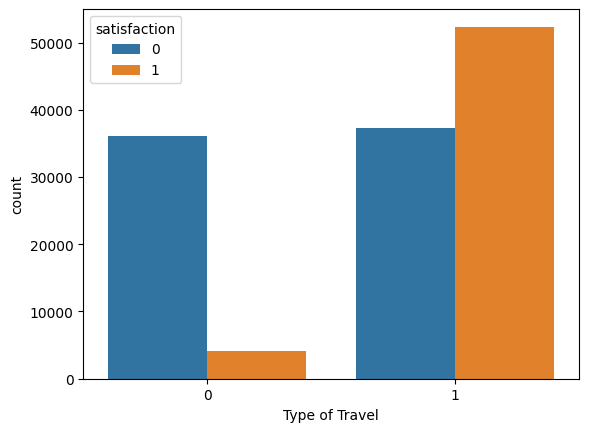

In [70]:
plt.figure()                                            
sns.countplot(x="Type of Travel",data=df,hue="satisfaction");

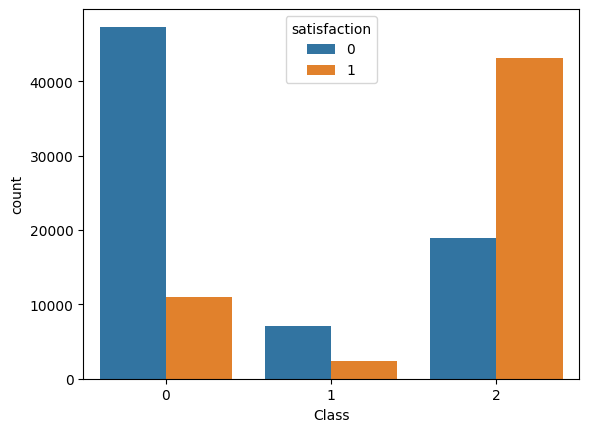

In [69]:
plt.figure()                                            
sns.countplot(x="Class",data=df,hue="satisfaction");

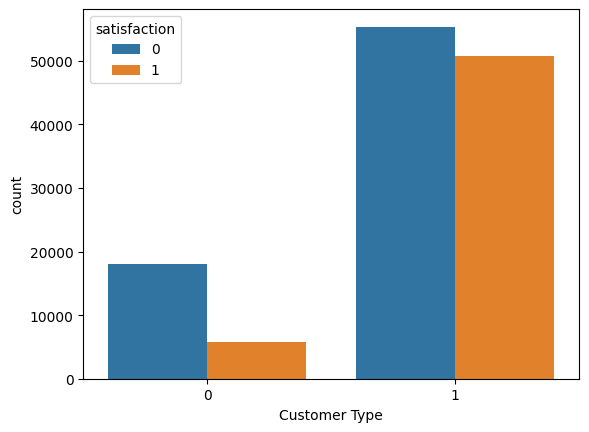

In [68]:
plt.figure()                                            
sns.countplot(x="Customer Type",data=df,hue="satisfaction");

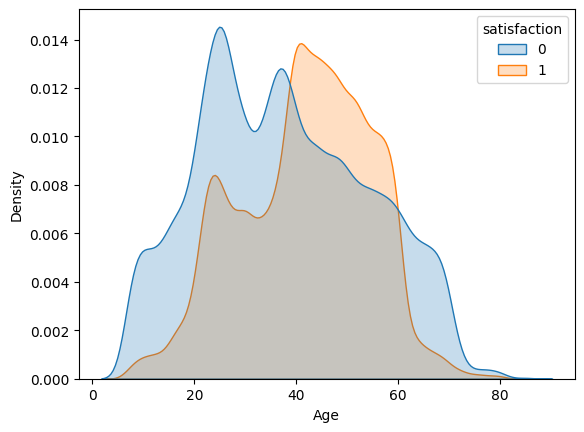

In [18]:
plt.figure()
sns.kdeplot(x="Age",hue="satisfaction",data=df,shade=True);

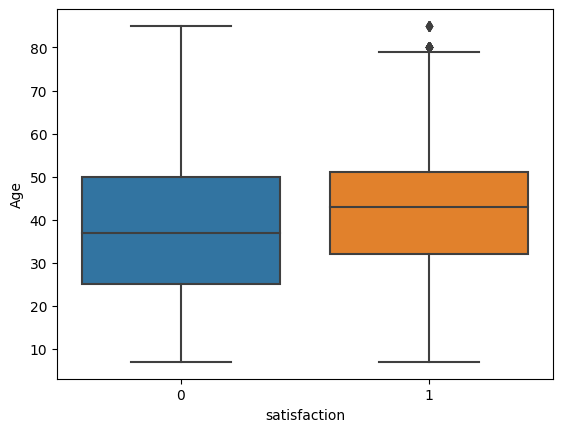

In [19]:
plt.figure()
sns.boxplot(y="Age",x="satisfaction",data=df);

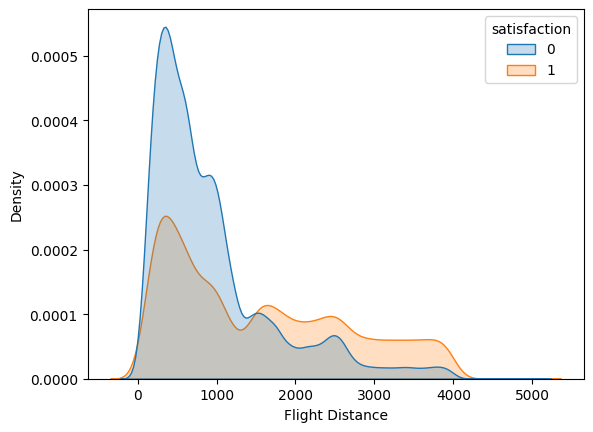

In [20]:
sns.kdeplot(x="Flight Distance",hue="satisfaction",data=df,shade=True);
plt.show();

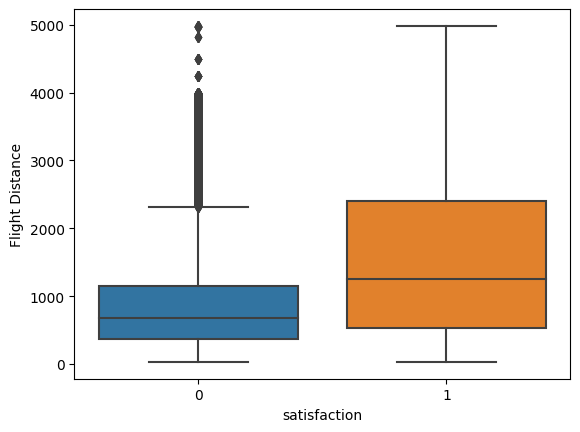

In [21]:
plt.figure()
sns.boxplot(y="Flight Distance",x="satisfaction",data=df);

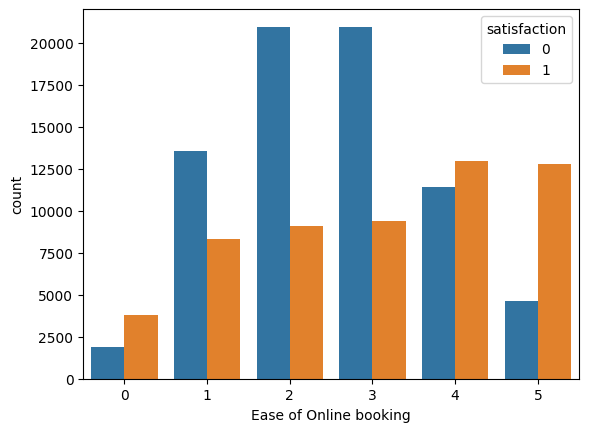

In [22]:
plt.figure()
sns.countplot(x="Ease of Online booking",hue="satisfaction",data=df);

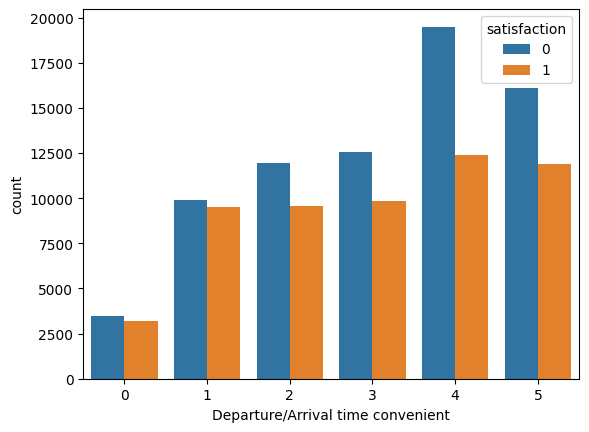

In [23]:
plt.figure()
sns.countplot(x="Departure/Arrival time convenient",hue="satisfaction",data=df);

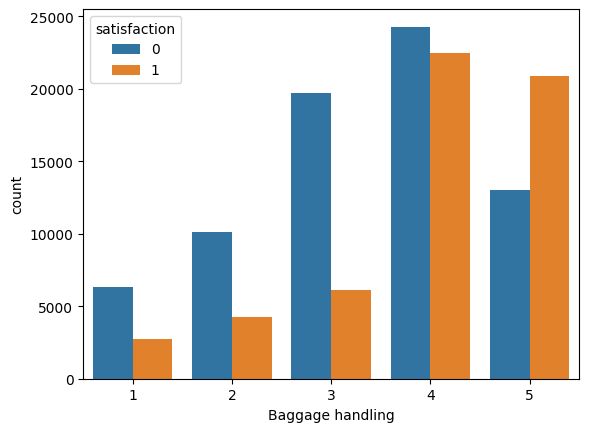

In [24]:
plt.figure()
sns.countplot(x="Baggage handling",hue="satisfaction",data=df);

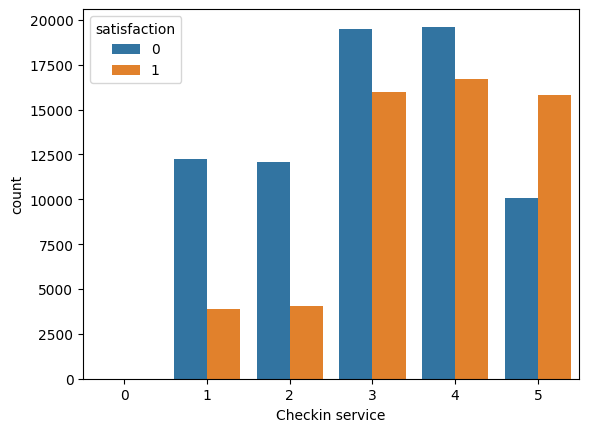

In [25]:
plt.figure()
sns.countplot(x="Checkin service",hue="satisfaction",data=df);

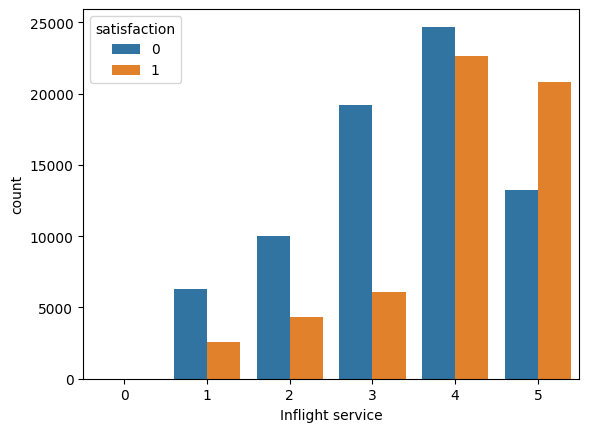

In [26]:
plt.figure()
sns.countplot(x="Inflight service",hue="satisfaction",data=df);

<AxesSubplot: xlabel='On-board service', ylabel='count'>

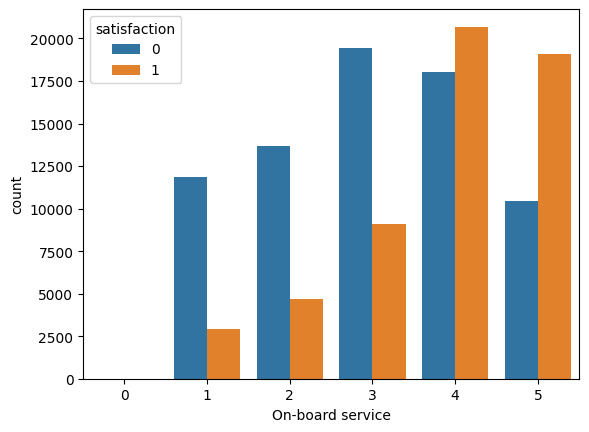

In [27]:
plt.figure()
sns.countplot(x="On-board service",hue="satisfaction",data=df)

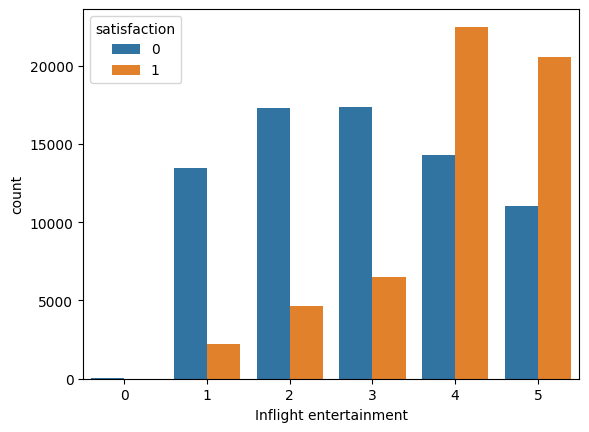

In [28]:
plt.figure()
sns.countplot(x="Inflight entertainment",hue="satisfaction",data=df);

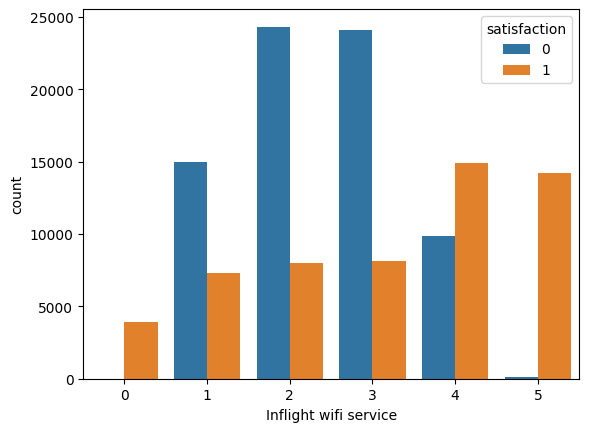

In [29]:
plt.figure()
sns.countplot(x="Inflight wifi service",hue="satisfaction",data=df);

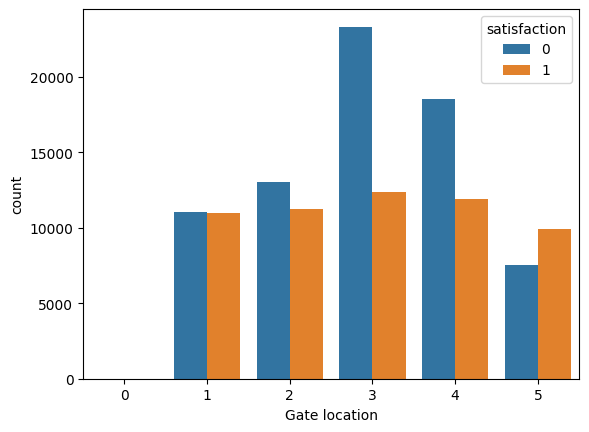

In [30]:
plt.figure()
sns.countplot(x="Gate location",hue="satisfaction",data=df);

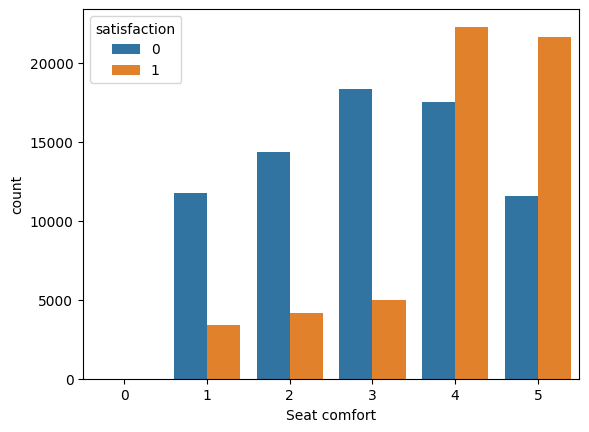

In [31]:
plt.figure()
sns.countplot(x="Seat comfort",hue="satisfaction",data=df);

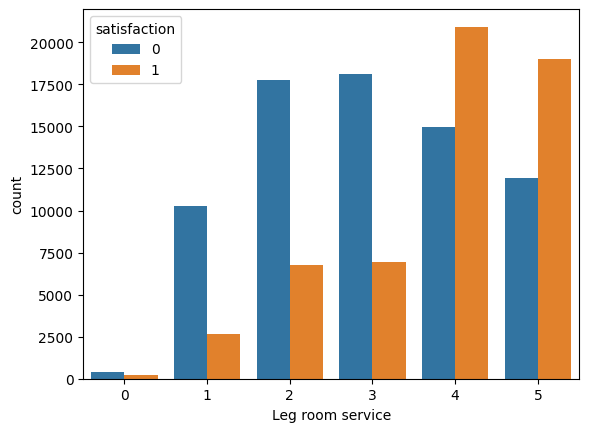

In [32]:
plt.figure()
sns.countplot(x="Leg room service",hue="satisfaction",data=df);

<Figure size 1200x800 with 0 Axes>

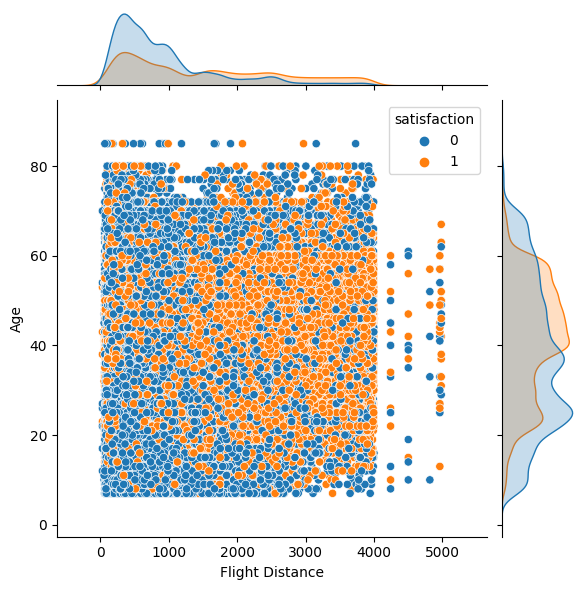

In [33]:
plt.figure(figsize=(12,8))
sns.jointplot(x="Flight Distance",y="Age",hue="satisfaction",data=df);

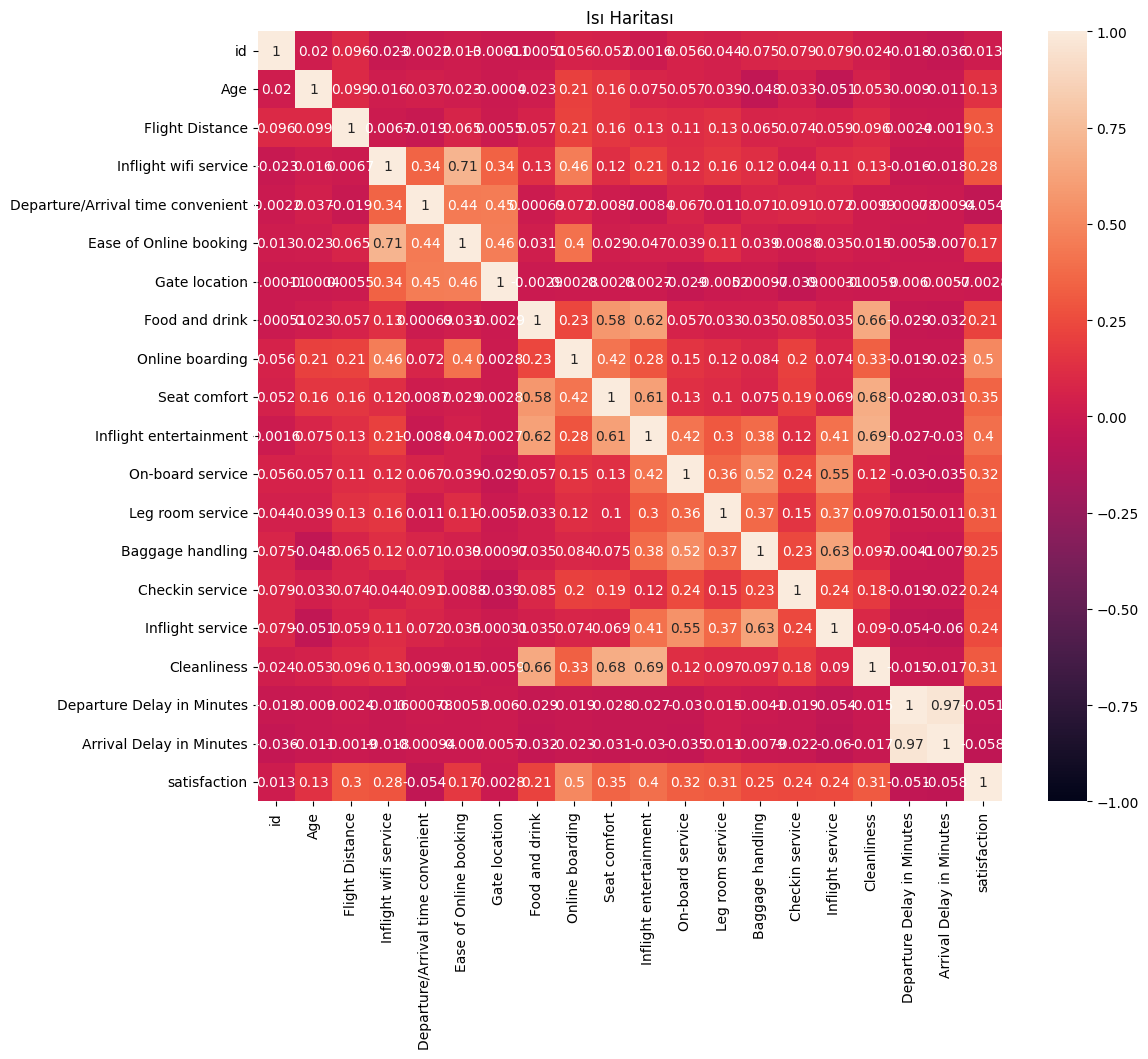

In [34]:
korelasyon = df.corr();
plt.figure(figsize=(12, 10));
sns.heatmap(korelasyon, annot=True, vmin=-1.0);    
plt.title("Isı Haritası");
plt.show();

## Veri Ön İşleme

In [35]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

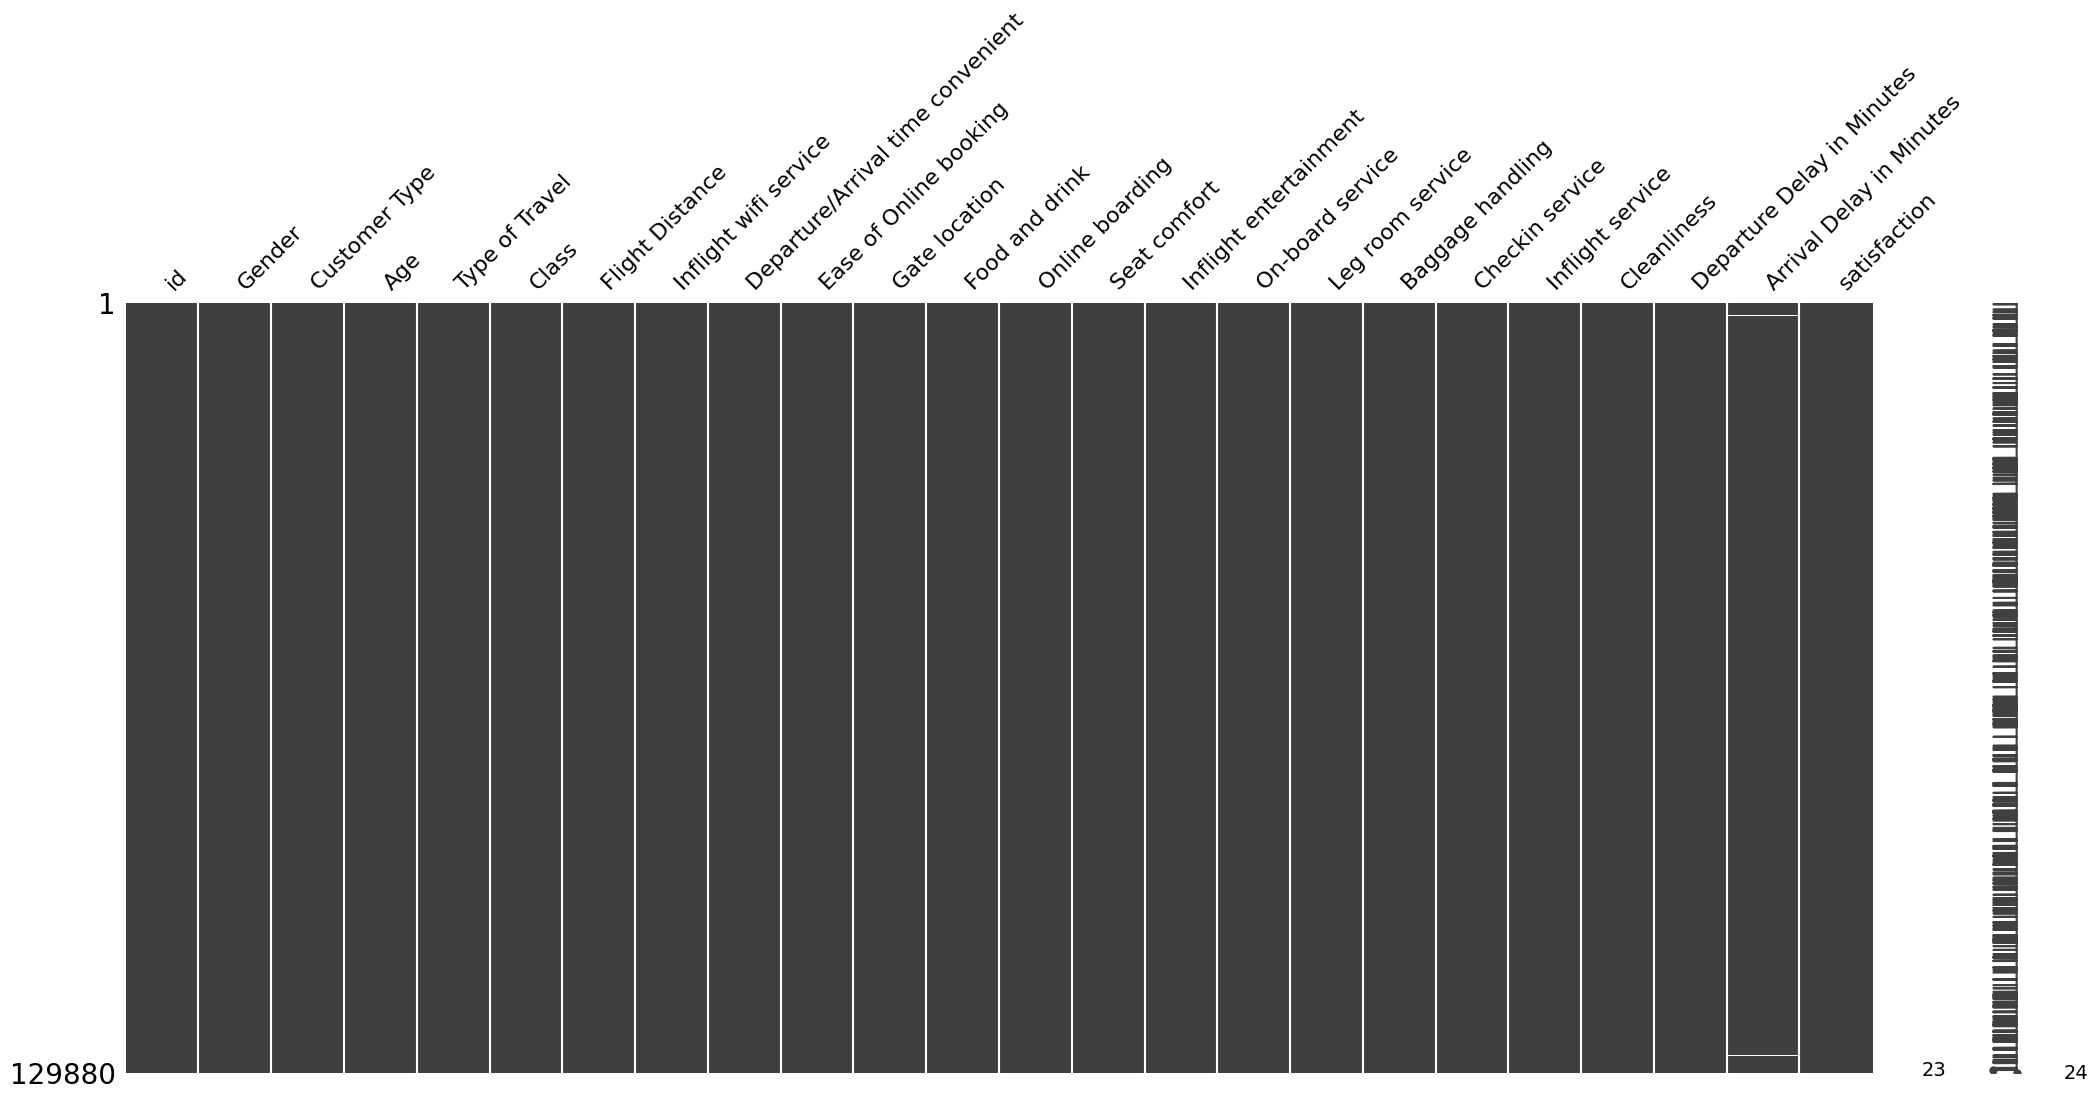

In [36]:
msno.matrix(df)
plt.show()

In [37]:
df["Arrival Delay in Minutes"].fillna(value=df["Arrival Delay in Minutes"].mean(),inplace=True) 

In [38]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [39]:
col=[col for col in df.columns if df[col].dtype=="object" and df[col].nunique()<10]
col

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [40]:
for x in col:
    print(x)
    print(df[x].unique())

Gender
['Male' 'Female']
Customer Type
['Loyal Customer' 'disloyal Customer']
Type of Travel
['Personal Travel' 'Business travel']
Class
['Eco Plus' 'Business' 'Eco']


In [41]:
df["Customer Type"]=df["Customer Type"].map({"disloyal Customer":0,"Loyal Customer":1})
df["Type of Travel"]=df["Type of Travel"].map({"Personal Travel":0,"Business travel":1})
df["Class"]=df["Class"].map({"Eco":0,"Eco Plus":1,"Business":2})

In [42]:
df=df.drop(["id"],axis=1)

In [43]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [44]:
df=pd.get_dummies(df,columns=["Gender"],drop_first=True)

In [45]:
df.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male
0,1,13,0,1,460,3,4,3,1,5,...,4,3,4,4,5,5,25,18.0,0,1
1,0,25,1,2,235,3,2,3,3,1,...,1,5,3,1,4,1,1,6.0,0,1
2,1,26,1,2,1142,2,2,2,2,5,...,4,3,4,4,4,5,0,0.0,1,0
3,1,25,1,2,562,2,5,5,5,2,...,2,5,3,1,4,2,11,9.0,0,0
4,1,61,1,2,214,3,3,3,3,4,...,3,4,4,3,3,3,0,0.0,1,1


## Test-Train 

In [46]:
X=df.drop("satisfaction",axis=1) 

In [47]:
y=df["satisfaction"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=37)

In [49]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(38964, 22)
(38964,)
(90916, 22)
(90916,)


## Model

In [50]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [51]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [52]:
y_pred = xgb_model.predict(X_test)
print("XGBoost Doğruluk Skoru:" + " "  +  "%" + str(round(100* accuracy_score(y_test, y_pred),2)))

XGBoost Doğruluk Skoru: %96.23


## Model Tunning 

#### XGBoost

In [55]:
xgb_params = {
        'n_estimators': [25,50,75,100], 
        'subsample': [0.6, 0.8, 1.0], 
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [56]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1)

In [58]:
xgb_cv_model.fit(X_train, y_train)

[13:40:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [25, 50, 75, 100],
                         'subsample': [0.6, 0.8, 1.0]})

In [59]:
xgb_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.8}

In [63]:
xgb = XGBClassifier(learning_rate = 0.1, 
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.8)

In [64]:
xgb_tuned =  xgb.fit(X_train,y_train)

[13:43:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



In [65]:
y_pred = xgb_model.predict(X_test)

In [66]:
print("XGBoost Doğruluk Skoru:" + " "  +  "%" + str(round(100* accuracy_score(y_test, y_pred),2)))

XGBoost Doğruluk Skoru: %96.23


In [ ]:
Importance = pd.DataFrame({"Importance": xgb_model.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

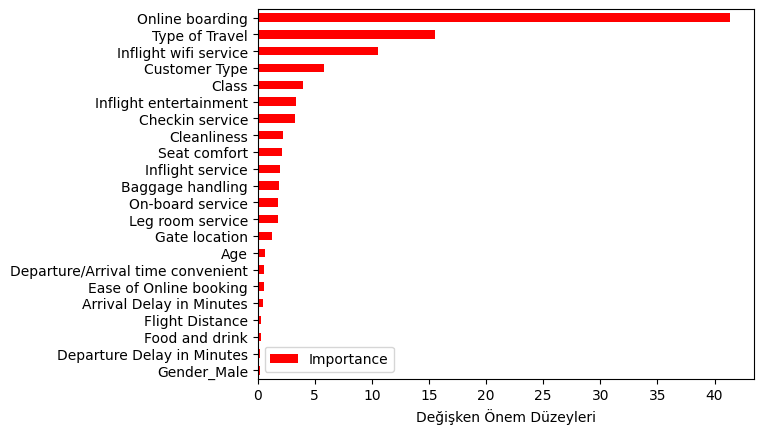

In [67]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")